In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [2]:
fake_path = r"/home/aryan/projecttres/Fake.csv"
true_path = r"/home/aryan/projecttres/True.csv"

text_column = 'text'

fake = pd.read_csv(fake_path)
true = pd.read_csv(true_path)

fake['label'] = 0 # fake = 0
true['label'] = 1 # true = 1

data = pd.concat([fake[[text_column, 'label']], true[[text_column, 'label']]], ignore_index=True)
data = data.rename(columns={text_column: 'text'})
data = data.dropna(subset=['text'])

print(f"Total articles: {len(data)} ({data['label'].value_counts().to_dict()})")
data.head()

Total articles: 44898 ({0: 23481, 1: 21417})


,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [3]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))

X = vectorizer.fit_transform(data['text'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Features: {X.shape[1]} TF-IDF terms")
print(f"Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")

Features: 5000 TF-IDF terms
Train: 35918 | Test: 8980


In [5]:
sample_data = data.sample(n=min(5000, len(data)), random_state=42)

X_sample = vectorizer.fit_transform(sample_data['text'])
y_sample = sample_data['label']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

models = {}
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_s, y_train_s)
models['Logistic Regression'] = lr

nb = MultinomialNB()
nb.fit(X_train_s, y_train_s)
models['Naive Bayes'] = nb

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_s, y_train_s)
models['Random Forest'] = rf

print("All models trained on sampled data")

All models trained on sampled data


In [6]:
results = {}

for name, model in models.items():
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
best_pred = best_model.predict(X_test)

print(f"\nBest model: {best_model_name} ({results[best_model_name]:.4f})")
print("\nClassification Report:")
print(classification_report(y_test, best_pred, target_names=['Fake', 'Real']))

Logistic Regression: Accuracy = 0.5277
Naive Bayes: Accuracy = 0.6469
Random Forest: Accuracy = 0.5442

Best model: Naive Bayes (0.6469)

Classification Report:
              precision    recall  f1-score   support

        Fake       0.64      0.76      0.69      4696
        Real       0.66      0.53      0.59      4284

    accuracy                           0.65      8980
   macro avg       0.65      0.64      0.64      8980
weighted avg       0.65      0.65      0.64      8980



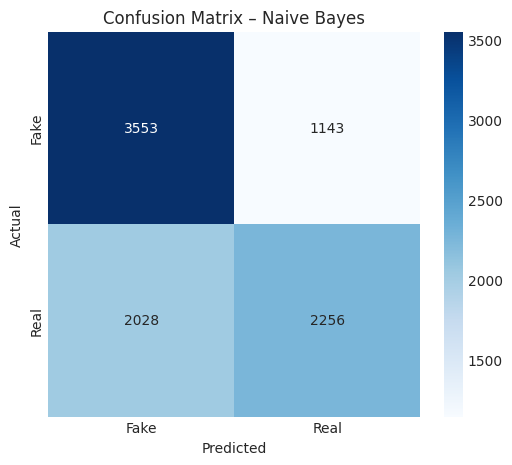

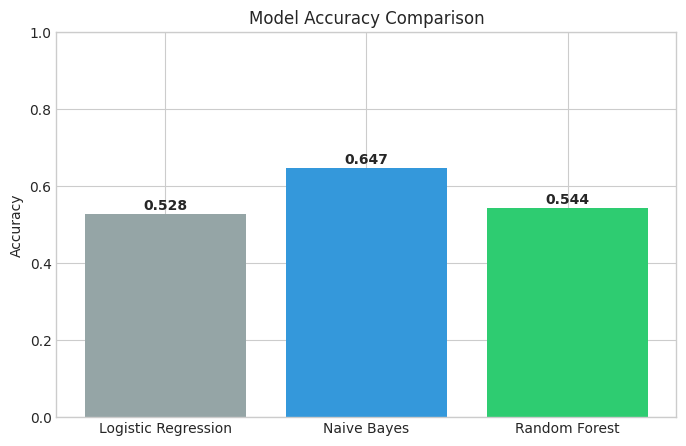

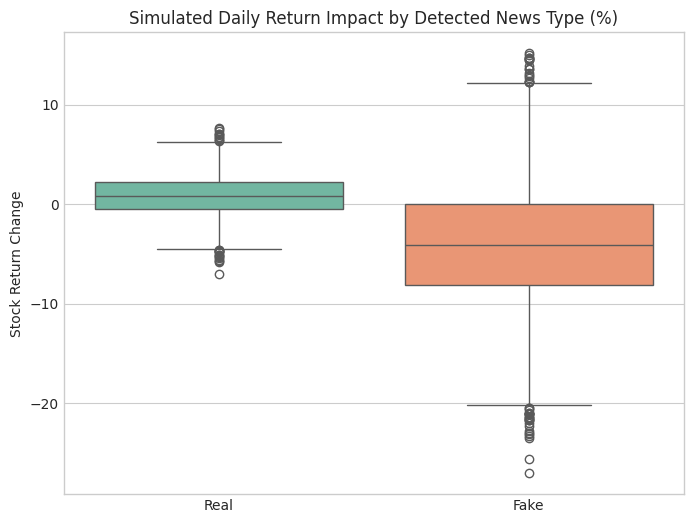


Project 3 complete – no transformers
Classical ML fake news detection + volatility simulation


In [7]:
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title(f'Confusion Matrix – {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['#95a5a6', '#3498db', '#2ecc71', '#e74c3c'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha='center', weight='bold')
plt.show()

np.random.seed(42)
impact = np.where(best_pred == 0, np.random.normal(-4, 6, len(best_pred)), np.random.normal(0.8, 2, len(best_pred)))

plt.figure(figsize=(8,6))
sns.boxplot(x=['Fake' if p==0 else 'Real' for p in best_pred], y=impact, palette='Set2')
plt.title('Simulated Daily Return Impact by Detected News Type (%)')
plt.ylabel('Stock Return Change')
plt.show()

print("\nProject 3 complete – no transformers")
print("Classical ML fake news detection + volatility simulation")